# Morphological Operations

Morphology generally concerned with shape and properties of objects. 
Two basic operations are Erosion and Dilation.

Dilation: Adds pixels to the boundaries of objects in an image. (expanding shapes)

Erosion: Removes pixels on object boundaries.

The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

A structuring element is a shape mask used in the basic morphological operations. They can be any shape and size that is digitally representable, and each has an origin.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def show_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = read_img()

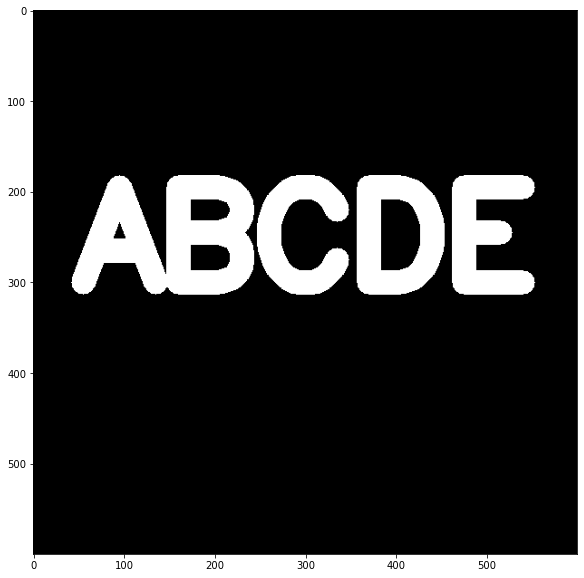

In [5]:
show_img(img)

## Dilation

In [6]:
structElement = np.ones((5,5),np.uint8)
dilation1 = cv2.dilate(img,structElement,iterations = 1)

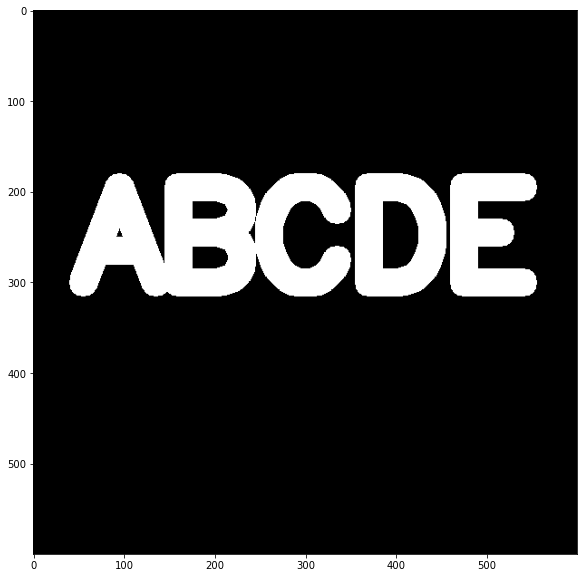

In [7]:
show_img(dilation1)

In [8]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
dilation4 = cv2.dilate(img,structElement,iterations = 4)

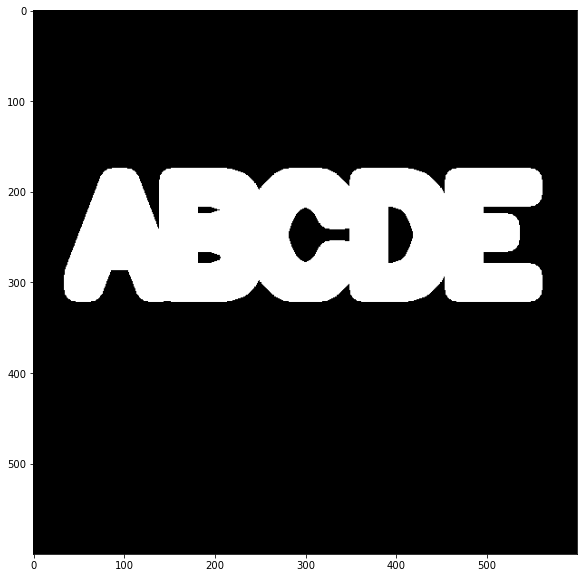

In [9]:
show_img(dilation4)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [10]:
structElement = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,structElement,iterations = 1)

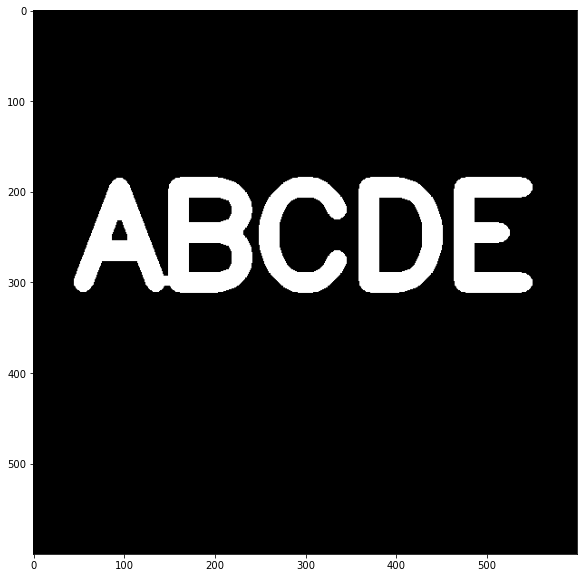

In [11]:
show_img(erosion1)

In [12]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
erosion4 = cv2.erode(img,structElement,iterations = 4)

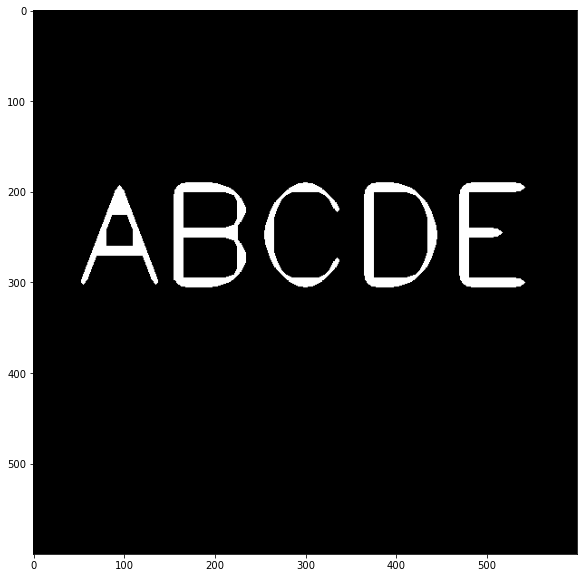

In [13]:
show_img(erosion4)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [14]:
img = read_img()

In [15]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [16]:
white_noise

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1]])

In [17]:
white_noise = white_noise*255

In [47]:
white_noise

array([[  0, 255,   0, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0,   0, 255],
       [255, 255,   0, ..., 255,   0, 255]])

In [18]:
white_noise.shape

(600, 600)

In [19]:
img.shape

(600, 600)

In [20]:
noise_img = white_noise+img

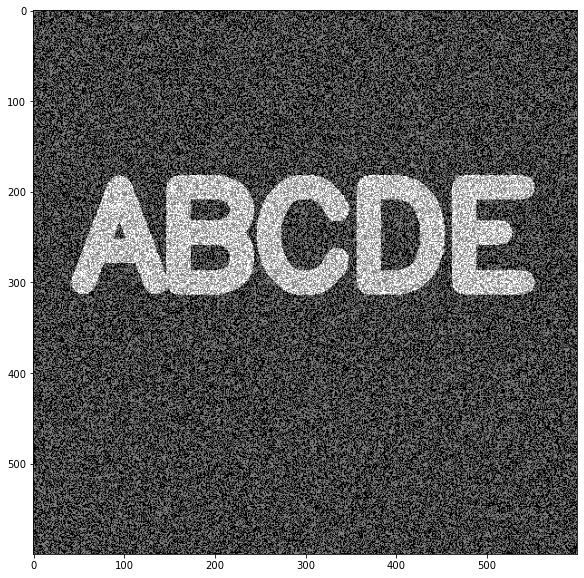

In [21]:
show_img(noise_img)

In [22]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, structElement)

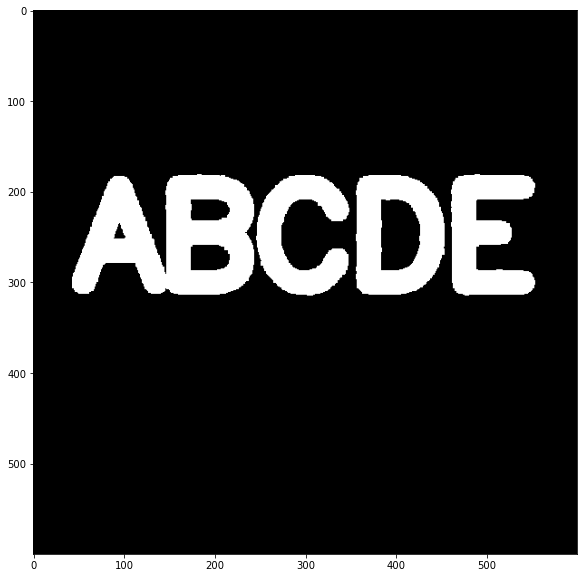

In [23]:
show_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [24]:
img = read_img()

In [25]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [26]:
black_noise

array([[0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [27]:
black_noise= black_noise * -255

In [28]:
black_noise_img = img + black_noise

In [29]:
black_noise_img

array([[   0., -255., -255., ...,    0.,    0., -255.],
       [   0., -255., -255., ..., -255., -255.,    0.],
       [   0., -255.,    0., ..., -255., -255., -255.],
       ...,
       [-255.,    0., -255., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ..., -255.,    0.,    0.],
       [-255.,    0.,    0., ...,    0.,    0.,    0.]])

In [30]:
black_noise_img[black_noise_img==-255] = 0

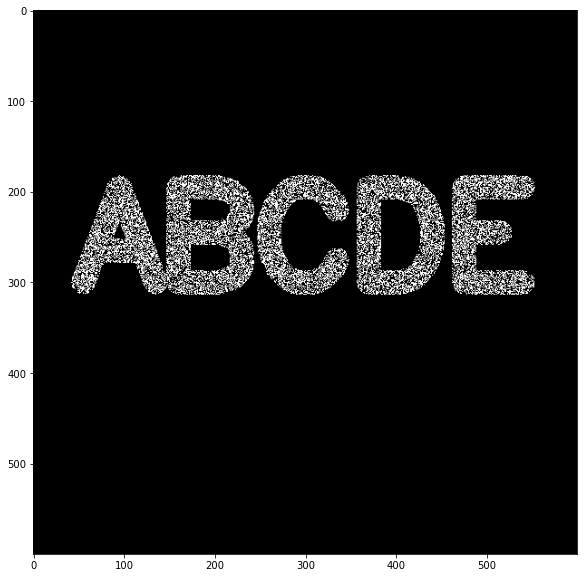

In [31]:
show_img(black_noise_img)

In [32]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, structElement)

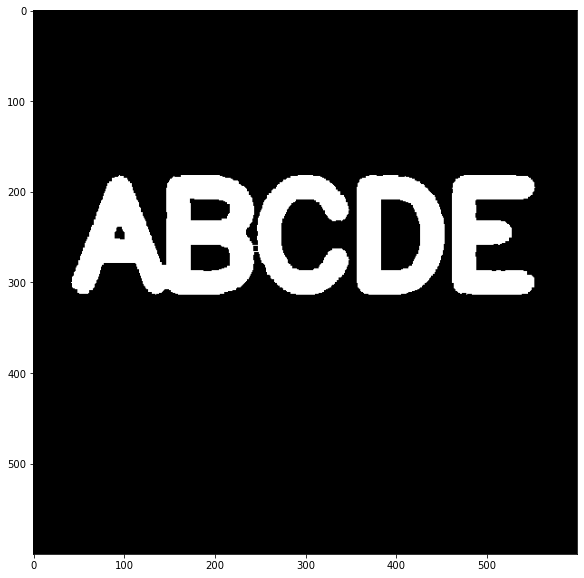

In [33]:
show_img(closing)

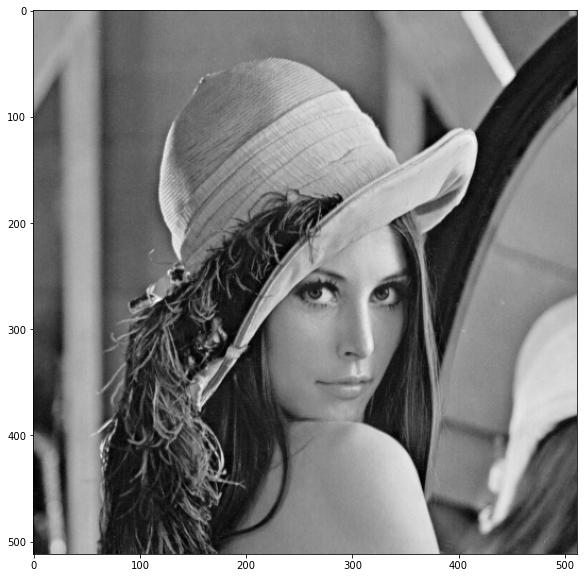

In [34]:
binImage = cv2.imread("lady_image.png",0)
show_img(binImage)

In [35]:
structElement = np.ones((5,5), np.uint8)

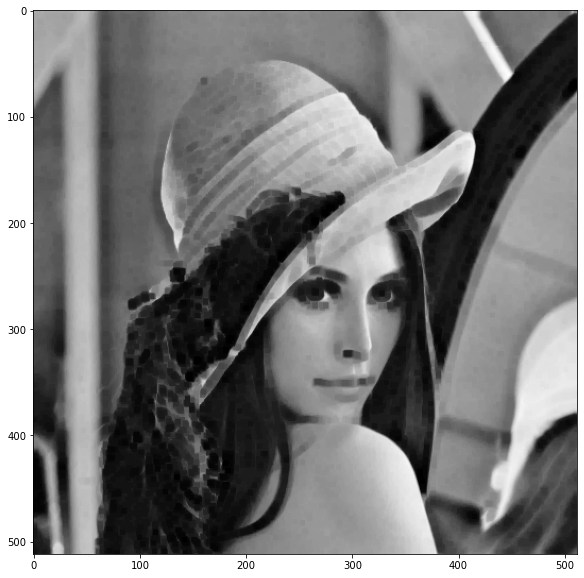

In [36]:
erosionlady = cv2.erode(binImage.copy(), structElement, iterations = 1)
show_img(erosionlady)

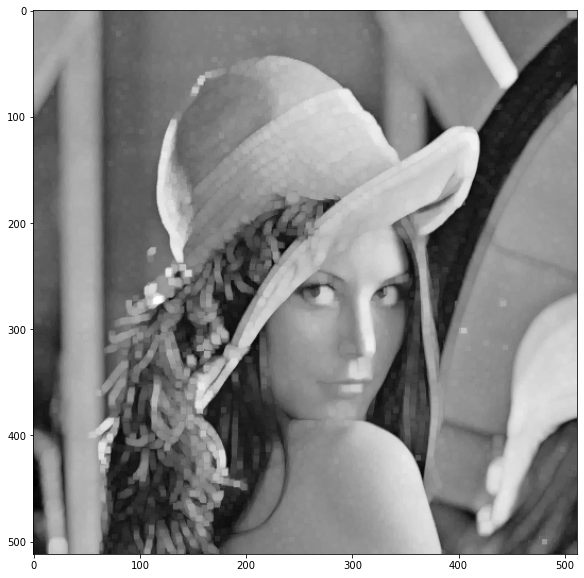

In [37]:
dilationlady = cv2.dilate(binImage.copy(), structElement, iterations = 1)
show_img(dilationlady)

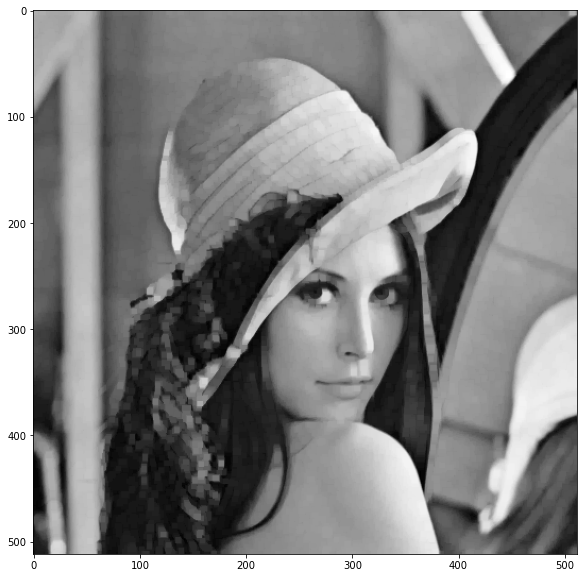

In [38]:
# opening - erosion + dilation (in that order)
openingmorph = cv2.morphologyEx(binImage.copy(), cv2.MORPH_OPEN,
                           structElement, iterations=1)

show_img(openingmorph)

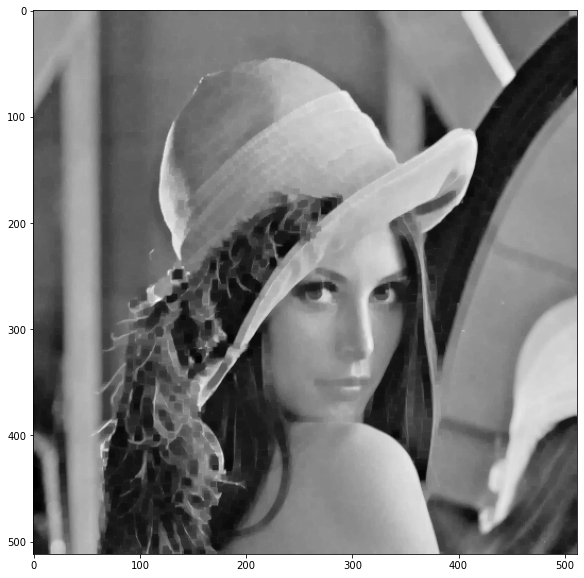

In [39]:
#closing - dilation+erosion
closing = cv2.morphologyEx(binImage.copy(), cv2.MORPH_CLOSE,
                           structElement, iterations=1)

show_img(closing)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In morphology and digital image processing, top-hat and black-hat transform are operations that are used to extract small elements and details from given images. These two types of transforms in which, the top-hat transform is defined as the difference between the input image and its opening by some structuring element, while the black-hat transform is defined as the difference between the closing and the input image. These transforms are used for various image processing tasks, such as feature extraction, background equalization, image enhancement, and others.

The top-hat filter is used to enhance bright objects of interest in a dark background. The black-hat operation is used to do the opposite, enhance dark objects of interest in a bright background.

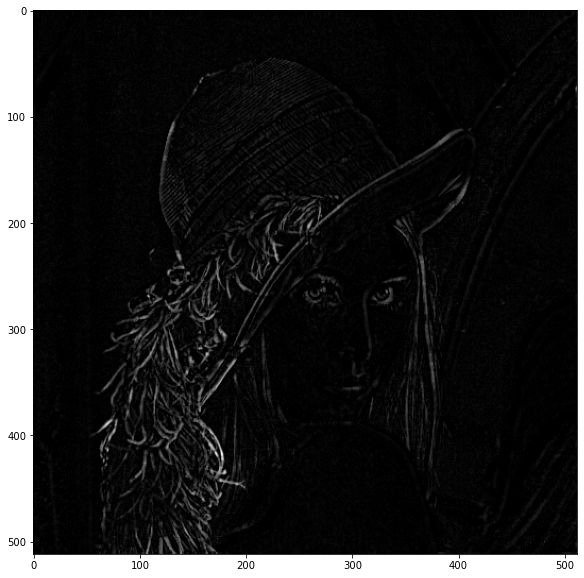

In [40]:
tophatmorph = cv2.morphologyEx(binImage, cv2.MORPH_TOPHAT,
                           structElement, iterations=1)
show_img(tophatmorph)

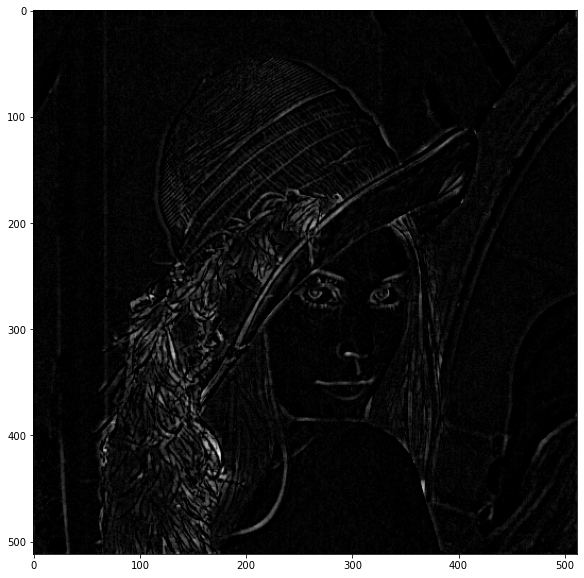

In [41]:
blackhatmorph = cv2.morphologyEx(binImage, cv2.MORPH_BLACKHAT,
                           structElement, iterations=1)

show_img(blackhatmorph)

## Morphological Gradient

Difference between dilation and erosion of an image.

Morphological Gradient is the operation that is equal to the difference between dilation and erosion of an image. Each pixel value in the resulting image indicates the contrast intensity in the nearby pixels. This is used in edge detection, segmentation and to find the outline of an object. (the gradient is the derivative of a multi-variable function)

In [42]:
img = read_img()

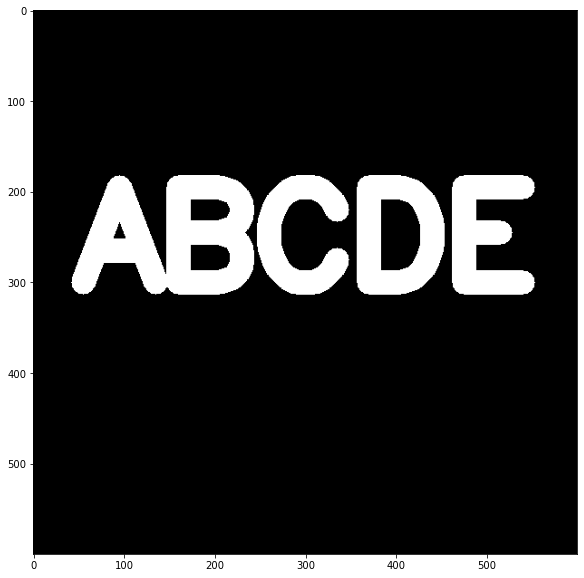

In [43]:
show_img(img)

In [44]:
kernel = np.ones((5,5), np.uint8)

In [45]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

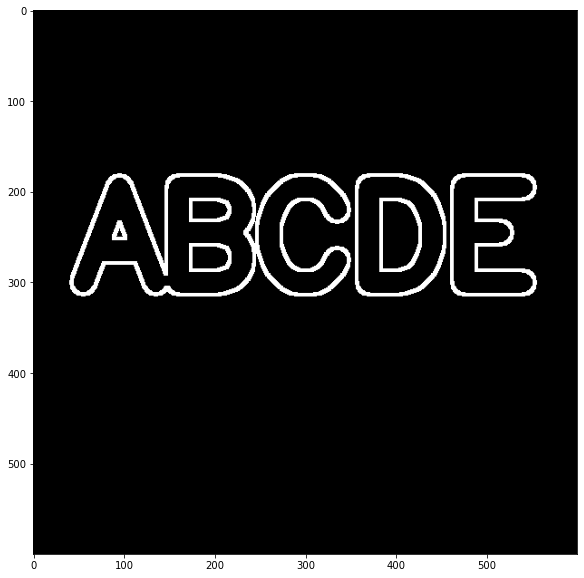

In [46]:
show_img(gradient)